In [8]:
from scipy.sparse import spdiags,csc_matrix
from scipy.sparse.linalg import bicgstab
import numpy as np
import matplotlib.pyplot as plt

xmax    = 3.
ymax    = 3.
nx      = 60
ny      = 40

x       = np.linspace(-xmax,xmax,nx)
dx      = x[1]-x[0]
y       = np.linspace(-ymax,ymax,ny)
dy      = y[1]-y[0]

x2d,y2d = np.meshgrid(x,y,indexing='ij')
r2d     = np.sqrt(x2d**2+y2d**2)
rho2d   = np.zeros_like(r2d)
rho2d[r2d<1] = 1.


# Set up the matrix and rhs
Adiags  = np.zeros((5,nx*ny))
offsets = np.array([0,-ny,ny,-1,1])
rhs     = rho2d.flatten()         # Right-hand-side is rho2d

def matindex(ix,iy,nx,ny):
    assert ix>=0, 'ix too small'
    assert ix<nx, 'ix too big'
    assert iy>=0, 'iy too small'
    assert iy<ny, 'iy too big'
    return ix*ny + iy

# Differential equation
for ix in range(1,nx-1):
    for iy in range(1,ny-1):

        # The d^2 / dx^2 operator
        Adiags[1,matindex(ix,iy,nx,ny)+offsets[1]] += 1/dx**2
        Adiags[0,matindex(ix,iy,nx,ny)+offsets[0]] -= 2/dx**2
        Adiags[2,matindex(ix,iy,nx,ny)+offsets[2]] += 1/dx**2
        
        # The d^2 / dy^2 operator
        Adiags[3,matindex(ix,iy,nx,ny)+offsets[3]] += 1/dy**2
        Adiags[0,matindex(ix,iy,nx,ny)+offsets[0]] -= 2/dy**2
        Adiags[4,matindex(ix,iy,nx,ny)+offsets[4]] += 1/dy**2
        
# Boundary conditions Phi=0
for ix in range(0,nx):
    Adiags[0,matindex(ix,0,nx,ny)]    = 1
    Adiags[0,matindex(ix,ny-1,nx,ny)] = 1
    rhs[matindex(ix,0,nx,ny)]         = 0
    rhs[matindex(ix,ny-1,nx,ny)]      = 0

for iy in range(0,ny):
    Adiags[0,matindex(0,iy,nx,ny)]    = 1
    Adiags[0,matindex(nx-1,iy,nx,ny)] = 1
    rhs[matindex(0,iy,nx,ny)]         = 0
    rhs[matindex(nx-1,iy,nx,ny)]      = 0

# Create the sparse matrix in CSC format
Asparse = csc_matrix(spdiags(Adiags,offsets, nx*ny, nx*ny))



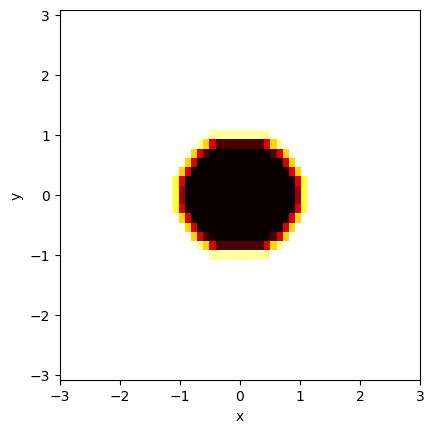

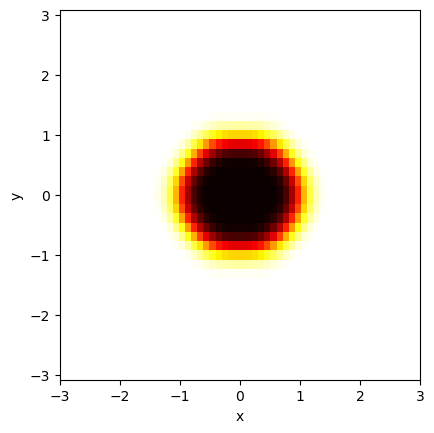

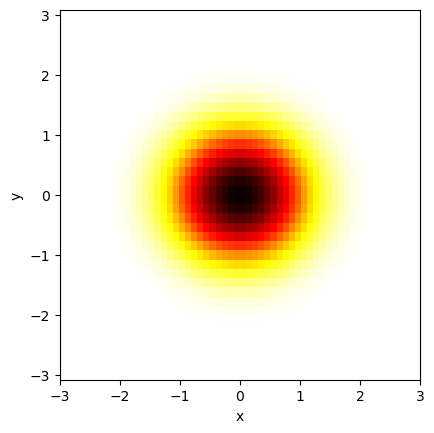

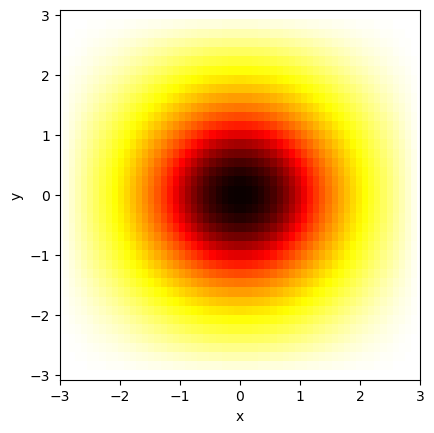

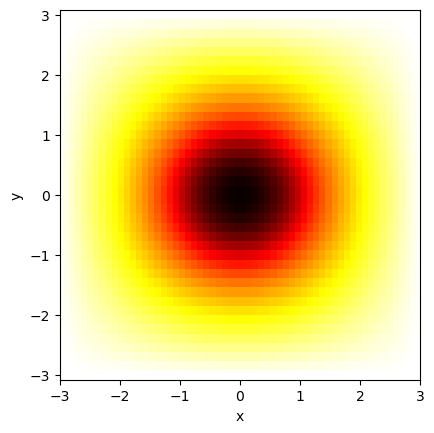

In [14]:
# Solve
iters = [1, 3, 10, 30, 100]

for it in iters:
    phi, exit_code = bicgstab(Asparse, rhs, maxiter=it)
    Phi = phi.reshape((nx, ny))

    # Plot
    fig,ax = plt.subplots()
    ax.pcolormesh(x2d,y2d,Phi,rasterized=True,cmap='hot')
    ax.set_aspect('equal')
    ax.set_xlim((x.min(),x.max()))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    


it:  1
it:  3
it:  10
it:  30
it:  100


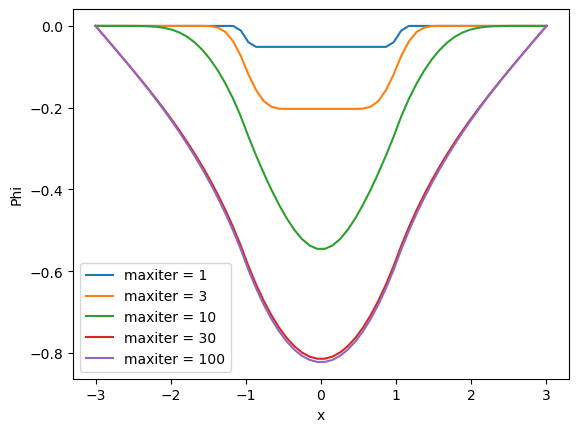

In [20]:

for it in iters:
    phi, exit_code = bicgstab(Asparse, rhs, maxiter=it)
    Phi = phi.reshape((nx, ny))
        
    plt.plot(x2d[:, ny//2], Phi[:, ny//2], label=f"maxiter = {it}")
    print("it: ",it)
plt.xlabel('x')
plt.ylabel('Phi')
plt.legend()
plt.show()